Explained variance ratio of PC1 and PC2: [0.44272026 0.18971182]
Cumulative explained variance: [0.44272026 0.63243208]
Figure saved to: C:\Users\jeffr\principal_component_analysis_project\pca_outputs\2d_pca_breast_cancer_dataset.png


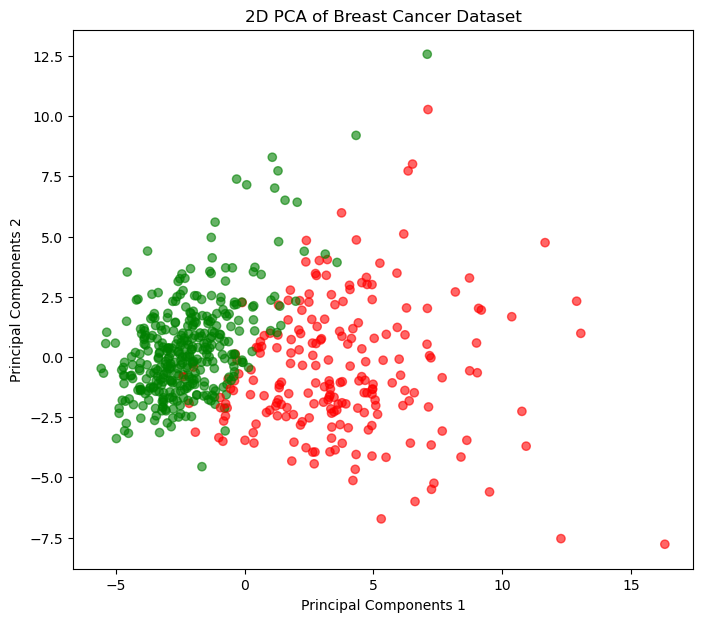

In [6]:
# 2. Dimensionality Reduction: Reduce the dataset into 2 PCA components for the project.

# Step 1: Import libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pca_utils import save_figure

# Step 2: Load the dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name='target')  # 0 =malignant, 1 = benign

# Step 3: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

# Step 5: Create a DataFrame with the 2 principal components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Step 6: Explained variance by the 2 components
print("Explained variance ratio of PC1 and PC2:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.cumsum())

# Step 7: Visualize the 2D PCA
plt.figure(figsize=(8,7))
colors = ['red' if t==0 else 'green' for t in y]
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=colors, alpha=0.6)
plt.xlabel('Principal Components 1')
plt.ylabel('Principal Components 2')
plt.title('2D PCA of Breast Cancer Dataset')
fig = plt.gcf()
save_figure(fig, "2d_pca_breast_cancer_dataset.png")
plt.show()
